<a href="https://colab.research.google.com/github/NehaKumari500092077/Deep-Learning-Lab/blob/main/Jupyter%20Notebook%20on%20Feedforward%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward Neural Network (from scratch)

# Data Loading and Preprocessing


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Normalize the target to binary classification
y = (y > np.median(y)).astype(int)

# Split the dataset into training (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
len(X_train), len(X_test), len(X_val), len(X)

(309, 67, 66, 442)

In [ ]:
X_train.shape, y_train.shape

((309, 10), (309,))

# Neural Network Implementation

In [ ]:
class FeedforwardNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(hidden_size)
        self.b2 = np.zeros((1, output_size))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return Z > 0

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def forward(self, X):
        # Forward pass
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def compute_cost(self, Y_pred, Y):
        # Cross-entropy loss
        m = Y.shape[0]
        cost = -np.sum(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred)) / m
        return cost

    def backward(self, X, Y):
        m = X.shape[0]

        dZ2 = self.A2 - Y.reshape(-1,1)
        self.dW2 = np.dot(self.A1.T, dZ2) / m
        self.db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        self.dW1 = np.dot(X.T, dZ1) / m
        self.db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    def update_parameters(self, learning_rate):
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2

    def train(self, X_train, Y_train, X_val, Y_val, epochs, learning_rate, batch_size):
        train_losses = []
        val_losses = []

        for epoch in range(epochs):
            # Shuffle training data
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            X_train = X_train[indices]
            Y_train = Y_train[indices]

            # training
            train_loss = 0
            for i in range(0, X_train.shape[0], batch_size):
                end_idx = min(i + batch_size, X_train.shape[0])
                X_batch = X_train[i:end_idx]
                Y_batch = Y_train[i:end_idx]
                Y_pred = self.forward(X_batch)
                self.backward(X_batch, Y_batch)
                self.update_parameters(learning_rate)
                train_loss += self.compute_cost(Y_pred, Y_batch)

            avg_train_loss = train_loss/(len(range(0, X_train.shape[0], batch_size)))
            train_losses.append(avg_train_loss)

            # validation
            val_loss = 0
            for i in range(0, X_val.shape[0], batch_size):
                end_idx = min(i + batch_size, X_val.shape[0])
                X_batch = X_val[i:end_idx]
                Y_batch = Y_val[i:end_idx]
                Y_pred = self.forward(X_batch)
                val_loss += self.compute_cost(Y_pred, Y_batch)

            avg_val_loss = val_loss/(len(range(0, X_val.shape[0], batch_size)))
            val_losses.append(avg_val_loss)

            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

        return train_losses, val_losses

    def predict(self, X):
        Y_pred = self.forward(X)
        return (Y_pred > 0.5).astype(int)

def plot_loss(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
    plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Model Training and Evaluation

Epoch 1/100, Training Loss: 0.6733, Validation Loss: 0.6322
Epoch 11/100, Training Loss: 0.6734, Validation Loss: 0.6318
Epoch 21/100, Training Loss: 0.6725, Validation Loss: 0.6313
Epoch 31/100, Training Loss: 0.6691, Validation Loss: 0.6259
Epoch 41/100, Training Loss: 0.6601, Validation Loss: 0.6127
Epoch 51/100, Training Loss: 0.6345, Validation Loss: 0.5756
Epoch 61/100, Training Loss: 0.5947, Validation Loss: 0.5120
Epoch 71/100, Training Loss: 0.5584, Validation Loss: 0.4514
Epoch 81/100, Training Loss: 0.5314, Validation Loss: 0.4085
Epoch 91/100, Training Loss: 0.5125, Validation Loss: 0.4022


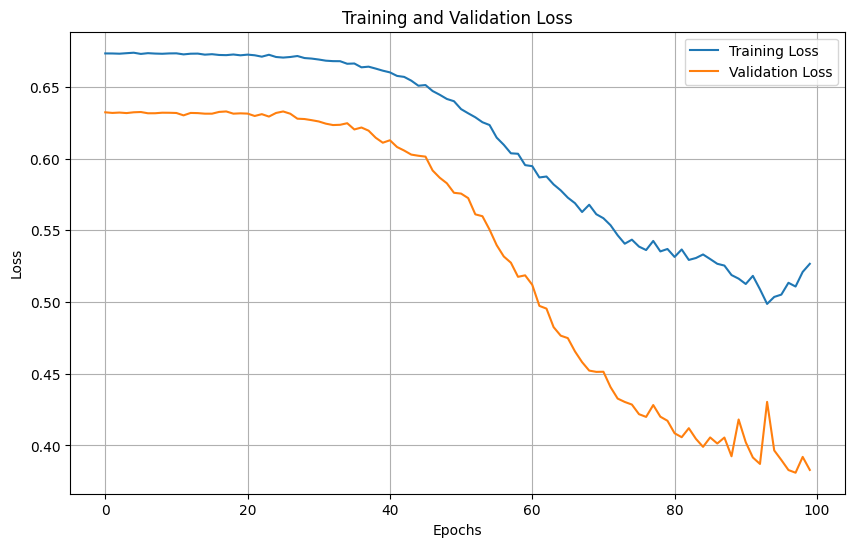

In [ ]:
# Initialize and train the neural network
input_size = X_train.shape[1]
hidden_size = 128
output_size = 1

y_train_reshaped = y_train.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

model = FeedforwardNeuralNetwork(input_size, hidden_size, output_size)

learning_rate = 0.1
batch_size = 10
epochs = 100

train_losses, val_losses = model.train(X_train, y_train_reshaped, X_val, y_val_reshaped, epochs, learning_rate, batch_size)

# Plot training loss
plot_loss(train_losses, val_losses)


# Save and Load Model Weights

In [ ]:
# Save the model weights
np.savez("model_weights.npz", W1=model.W1, b1=model.b1, W2=model.W2, b2=model.b2)

# Load the saved weights
weights = np.load("model_weights.npz")
model_inference = FeedforwardNeuralNetwork(input_size, hidden_size, output_size)
model_inference.W1 = weights["W1"]
model_inference.b1 = weights["b1"]
model_inference.W2 = weights["W2"]
model_inference.b2 = weights["b2"]


# Performance Evaluation

In [ ]:
# Perform prediction on the test set
y_pred = model_inference.predict(X_test)

# Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.7761
Precision: 0.7353
Recall: 0.8065


# Pytorch Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class PyTorchNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PyTorchNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_reshaped, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_reshaped, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_reshaped, dtype=torch.float32)

# Create data loaders for batch processing
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

# Train the model
def train_model(model, criterion, optimizer, num_epochs, train_loader, val_loader):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        train_loss = 0
        val_loss = 0
        for X_batch, y_batch in train_loader:
            # Training
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        avg_train_loss = train_loss/len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                val_outputs = model(X_batch)
                val_loss += criterion(val_outputs, y_batch)
        avg_val_loss = val_loss/len(val_loader)
        val_losses.append(avg_val_loss)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')

    return train_losses, val_losses

# Initialize model and training parameters
pytorch_model = PyTorchNN(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(pytorch_model.parameters(), lr=learning_rate)

# Train the model
train_losses, val_losses = train_model(pytorch_model, criterion, optimizer, epochs, train_loader, val_loader)

# Save model weights
torch.save(pytorch_model.state_dict(), 'pytorch_model_weights.pth')


Epoch [10/100], Train Loss: 0.6682, Val Loss: 0.6505
Epoch [20/100], Train Loss: 0.6296, Val Loss: 0.5864
Epoch [30/100], Train Loss: 0.5848, Val Loss: 0.5020
Epoch [40/100], Train Loss: 0.5569, Val Loss: 0.4786
Epoch [50/100], Train Loss: 0.5382, Val Loss: 0.4390
Epoch [60/100], Train Loss: 0.5153, Val Loss: 0.4149
Epoch [70/100], Train Loss: 0.5174, Val Loss: 0.4413
Epoch [80/100], Train Loss: 0.5061, Val Loss: 0.4258
Epoch [90/100], Train Loss: 0.5232, Val Loss: 0.4085
Epoch [100/100], Train Loss: 0.5076, Val Loss: 0.4201


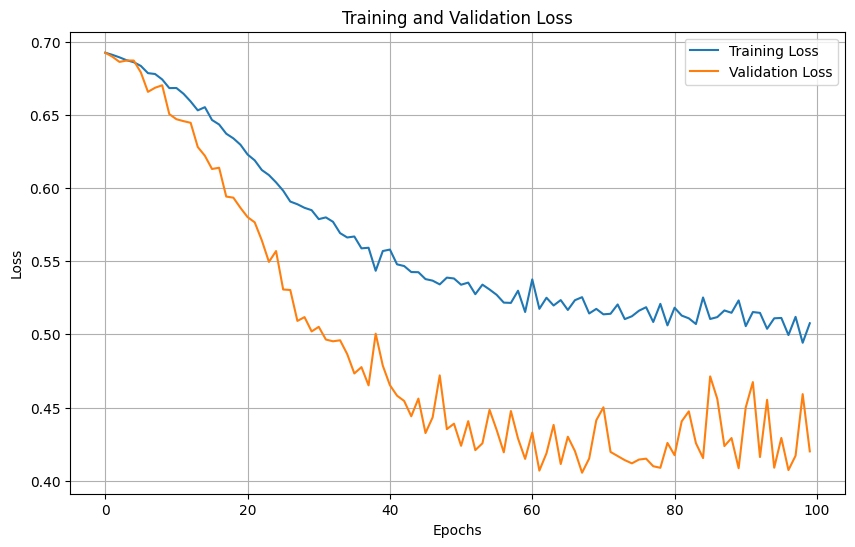

In [ ]:
plot_loss(train_losses, val_losses)

In [ ]:
pytorch_model.eval()
with torch.no_grad():
    y_pred = pytorch_model(X_test_tensor).numpy()
    y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.7612
Precision: 0.7273
Recall: 0.7742


# Programming Assingment 3

## Instructions:

1. The content that you submit must be your individual work.
2. Submit your code in .py as well as in .ipynb file format. Both these file submissions are required to receive credit for this assignment.
3. Ensure your code is well-commented and easy to follow. You can write your answers and explanations using text cells in the jupyter notebook files wherever required.
4. The files should be named as “(roll_number)_assignment_3”. For example, if your roll number is 23AI91R01, the code file names will be 23AI91R01_assignment_3.py and 23AI91R01_assignment_3.ipynb. You should place all these files within a single .zip file (do not upload a .rar file) and upload it to Moodle as 23AI91R01_assignment_3.zip. The zip file should only contain the .py and .ipynb files, and nothing else.
5. All submissions must be made through Moodle before the deadline. The submission portal will close at the specified time, and submissions via email would not be accepted.
6. The .ipynb file acts as your assignment report in addition to the implementation. Therefore, ensure that the .ipynb file is clear and easy to assess. To discourage plagiarism, the .py file is used to check for plagiarism with very strict deduction criteria. Anyone trying to bypass the plagiarism check with means such as gibberish text inside the code will also experience harsh deduction.
7. The primary TA for assignment 3 is Kartik Narayan Sahoo (kartik.sahoo@kgpian.iitkgp.ac.in). In case you have any query regarding the assignment, you can email the TA. Please do not call.

## Question 1 (2 marks)
Load the California housing dataset from scikit-learn.
Split the dataset into training, validation and test sets (70%-15%-15% split)

Standardize the features.

## Question 2 (6 marks)
Design a feedforward neural network from scratch (using just NumPy) with 2 hidden layers. Use ReLU activation for the hidden layers, and a suitable activation for the output layer.
Define a suitable cost function for this problem.

## Question 3 (3 marks)
Using stochastic gradient descent with a suitable learning rate and batch size, train the neural network you implemented. Show the variation of the training and validation losses with training progress.

## Question 4 (3 marks)
Adjust the hidden units of the 2 hidden layers to achieve a good performance on the validation set in terms of reducing the cost function.
Use cross validation to decide the number of hidden units in the 2 hidden layers and report the best number of hidden units that you obtained. Save the model weights for each version of the model (i.e. with different hidden layer sizes) at the end of each training, as well as the best model weights.

## Question 5 (2 marks)
Load the model weights corresponding to the best version of the model and perform prediction on the test set.  
Report the MSE on the test set and show a scatter plot of predictions vs. ground truths on the test set.

Plot the train and validation losses corresponding to the best model weights.

## Question 6 (3 marks)
Design the same model using PyTorch using the values of the best number of hidden units you obtained above as hidden layer sizes and train it. Show the variation of training and validation losses with training progress in this case as well.  

## Question 7 (1 marks)
Report the MSE performance of the model trained with PyTorch the test set and the corresponding prediction vs. ground truth scatter plot. Compare these with your from scratch implementation.  